In [16]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 13.7 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 KB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 21.4 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.2 MB/s eta 0:00:0031m19.9 MB/s eta 0:00:01


In [7]:
import handcalcs.render as render
from handcalcs import handcalc

# 1.0 Juros

Juros é a remuneração pelo uso do capital

$$ M = P + J $$
Em que:
$J = $ Juros,
$P = $ Principal ou capital inicial,
$M = $ Montante ou capital final

# 1.1 Taxas de Juros

No mercado financeiro, os juros são expressos como uma fração do capital inicial.

$$ J = i\times P $$
$$ M = (1 + i) P $$

# Exemplo 1

Um indivíduo faz um investimento de 10.000,00 reais pelo prazo de cinco meses. No final do prazo, ele recebe 10.800,00 reais. Determine:
- a) Os Juros recebidos
- b) A taxa de juros do negócio

a)

In [3]:
P = 10000 # reais
M = 10800 # reais
J = M - P
print(f' Juros recebidos: R$ {J} reais')

 Juros recebidos: R$ 800 reais


In [4]:
i = 100*(M/P - 1)
print(f' Taxa de juros: {round(i,2)} % a.p.')

 Taxa de juros: 8.0 % a.p.


# 1.2 Regimes de capitalização Discreta

### 1.2.1 Regime de capitalização discreta

- No regime de capitalização discreta os juros são incorporados ao capital no fim de cada intervalo.
- Basicamente temos dois tipos de capitalização discreta: regime de capitalização simples e regime de capitalização composta

#### 1.2.1.1. Regime de capitalização discreta simples

Regime de capitalização simples: Os juros são gerados exclusivamente sobre o capital P (principal) investido.

- $ M_0 = P = \rm{Principal}$
- $ M_1 = M_0 + i M_0 = (1 + i)M_0$
- $ M_2 = M_1 + i M_0 = M_0 + 2 i M_0 = (1 + 2 i)M_0$
- $ M_3 = M_2 + i M_0 = M_0 + 3 i M_0 = (1 + 3 i)M_0$
$$ M_n = (1 + n i)M_0 $$

In [8]:
#montante simples
@handcalc(jupyter_display=True)
def montante_simples(P, i, N):
    MS = (1+N*i/100)*P
    return MS

# Exemplo 2
Um indivíduo faz uma aplicação de R$20.000,00 por 5 anos numa instituição financeira que paga uma taxa de 7% a.a. (ao ano) no regime de capitalização simples. Qual é o montante da operação?

In [9]:
P = 20_000 # reais
N = 5 # anos
i = 7 # % a.a.
MS = montante_simples(P, i, N)
print(f' O montante da operação é R$ {MS}')

<IPython.core.display.Latex object>

 O montante da operação é R$ 27000.0


#### 1.2.1.2 Regime de capitalização discreta composta

Já no regime de capitalização composta os juros incidem sobre o Montante do período anterior

- $ M_0 = P  = \rm{Principal}$
- $ M_1 = M_0 + i M_0 = (1 + i) M_0$
- $ M_2 = M_1 + i M_1  = (1 + i) M_1 = (1 + i)^{2}M_0$
- $ M_3 = M_2 + i M_2 = (1 + i) M_2 = (1 + i)^{2} M_1 = (1 + i)^{3} M_0$
$$ M_n =  (1 + i)^{n} M_0 $$

In [12]:
# montante composto
@handcalc(jupyter_display=True)
def montante_composto(P, i, N):
    MC = P*(1 + i/100)**N
    return MC


# Exemplo 3
Um indivíduo toma um empréstimo de R$20.000,00 por um período de quatro meses. A taxa do empréstimo é de 0,65% a.m. (ao mês). Considerando o regime de juros compostos, determine o montante do empréstimo no final do período.

In [13]:
P = 20_000 # reais
N = 4 # meses
i = 0.65 # % a.m.
MC = montante_composto(P, i, N)
print(f' O montante da operação é {MC}')

<IPython.core.display.Latex object>

 O montante da operação é 20525.092005701248


# Comparação entre os regimes de capitalização simples e composta

In [20]:
P = 10_000 # reais
i = 7.1 #% a.a.
N = [0.5, 1, 20] # anos
MS = [montante_simples(P, i, n) for n in N]
MC = [montante_composto(P, i, n) for n in N]
dif = [x - y for x,y in zip(MS, MC)]
print(f' dif: {dif}')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 dif: [6.08701360379564, 0.0, -15226.608157146911]


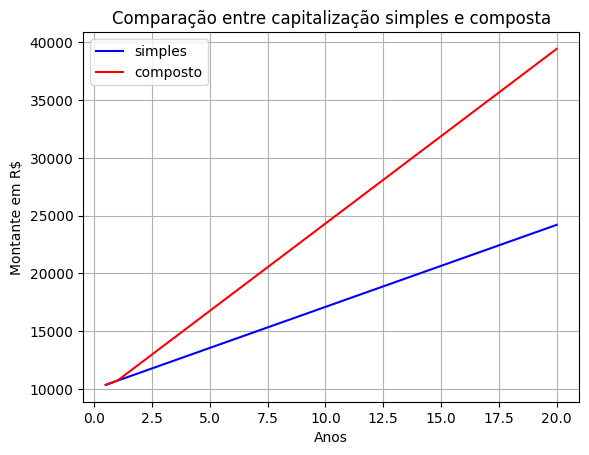

In [21]:
import matplotlib.pyplot as plt
plt.plot(N, MS, color= 'b', label = 'simples')
plt.plot(N, MC, color= 'r', label = 'composto')
plt.grid(True)
plt.xlabel('Anos')
plt.ylabel('Montante em R$')
plt.title('Comparação entre capitalização simples e composta')
plt.legend();


Referência Bibliográfica : José Roberto Securato. Cálculo financeiro das tesourarias; Bancos e empresas. Saint Paul Editora LTDA